In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [14]:
# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\March\\24.03.2023"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("fft_empty_2") :
        print(file)
        filepath =  directory_in_str +"\\" + file
        df1 = pd.read_csv(filepath,sep = '\t', engine = 'python')
        empty  = empty.append(df1)
    else :
        continue
        
empty.reset_index(inplace = True)
empty.drop(empty.iloc[:,0:16] ,axis=1,inplace=True)
empty["Label"] = 0
#empty = empty.T
empty.head()

Adding the following files : 
fft_empty_2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_6028\3049897373.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,4,5,5,5,6,5,5,7,6,6,...,15,16,13,12,15,13,13,14,15,0
1,3,3,3,4,5,3,3,4,4,6,...,16,18,15,15,17,15,15,17,18,0
2,4,4,4,5,5,5,4,5,5,7,...,18,19,15,14,16,14,14,15,16,0
3,3,5,4,4,5,4,4,5,5,6,...,16,18,14,15,15,14,14,15,16,0
4,4,4,4,4,5,5,5,5,5,6,...,16,18,14,13,16,13,14,15,16,0


In [11]:
# Reading all baby seat readings into one dataframe
baby = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("fft_baby_2") :
        print(file)
        filepath2 =  directory_in_str +"\\" + file
        df2 = pd.read_csv(filepath2, sep = '\t', engine = 'python')
        baby  = baby.append(df2)
    else :
        continue 

baby.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
# Baby seat Data ingest and attach Label = 1

baby.drop(baby.iloc[:,0:16] ,axis=1,inplace=True)
baby["Label"] = 1
#baby = baby.T
baby.head()

Adding the following files : 
fft_baby_2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_6028\3347564243.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,39,38,37,36,37,36,38,35,35,37,...,65,60,61,63,62,63,63,62,60,1
1,20,20,22,22,23,24,27,27,31,32,...,11,1,7,10,15,15,19,21,22,1
2,18,20,23,24,24,26,27,29,31,32,...,10,1,7,7,14,17,20,22,22,1
3,12,14,14,15,16,17,20,20,24,25,...,5,9,13,13,21,23,25,29,29,1
4,13,14,16,15,17,19,21,23,25,26,...,3,11,15,16,23,27,30,31,32,1


In [15]:
total = pd.concat([empty,baby])
total

,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43988,44107,44227,44346,44465,44584,44703,44823,44942,Label
0,4,5,5,5,6,5,5,7,6,6,...,15,16,13,12,15,13,13,14,15,0
1,3,3,3,4,5,3,3,4,4,6,...,16,18,15,15,17,15,15,17,18,0
2,4,4,4,5,5,5,4,5,5,7,...,18,19,15,14,16,14,14,15,16,0
3,3,5,4,4,5,4,4,5,5,6,...,16,18,14,15,15,14,14,15,16,0
4,4,4,4,4,5,5,5,5,5,6,...,16,18,14,13,16,13,14,15,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17,19,19,20,23,24,27,26,30,31,...,14,1,5,7,14,15,19,23,23,1
996,20,21,22,24,24,26,28,28,31,33,...,14,2,6,9,13,17,22,23,23,1
997,21,22,22,23,24,26,28,28,31,34,...,11,2,7,7,15,16,20,22,24,1
998,19,21,20,22,24,24,27,27,30,32,...,12,3,6,6,14,17,20,23,23,1


In [16]:
.shape

(1000, 86)

In [5]:
#Getting a copy of dataframe with only raw values and without any calculated columns or values

onlyval = pd.DataFrame()
onlyval = pd.concat([onlyval,total])
onlyval.drop("Label", axis=1, inplace=True)
onlyval

,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43869,43988,44107,44227,44346,44465,44584,44703,44823,44942
0,21,22,22,20,22,21,21,22,24,25,...,18,24,30,26,23,25,24,22,21,21
1,20,21,21,20,21,20,20,22,22,22,...,36,44,45,40,40,40,37,34,34,31
2,21,22,19,19,20,19,18,20,20,18,...,32,39,41,35,35,37,32,30,30,26
3,17,17,18,18,18,18,20,20,21,22,...,33,39,41,36,37,38,36,34,32,30
4,22,21,19,20,20,19,19,18,21,19,...,27,31,37,32,31,31,29,26,27,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,17,19,19,20,23,24,27,26,30,31,...,14,14,1,5,7,14,15,19,23,23
2026,20,21,22,24,24,26,28,28,31,33,...,13,14,2,6,9,13,17,22,23,23
2027,21,22,22,23,24,26,28,28,31,34,...,17,11,2,7,7,15,16,20,22,24
2028,19,21,20,22,24,24,27,27,30,32,...,16,12,3,6,6,14,17,20,23,23


<AxesSubplot: >

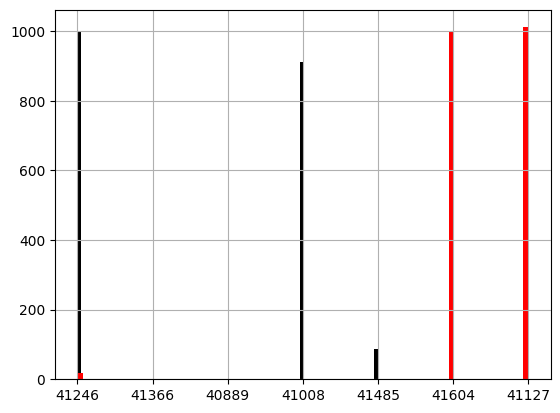

In [6]:
#Highest Peak - Distribution (black - empty readings, red - baby readings)
total["Max"] = total.idxmax(axis=1)
total["Max"].loc[total["Label"]== 0].hist(bins=85, color="black")
total["Max"].loc[total["Label"]== 1].hist(bins=85, color="red")
#total.drop("Max", axis=1, inplace=True )

#baby.nlargest(3, ['0':'4999'], 'last')
#empty.head()
#empty['Max'].hist(bins=85)

In [7]:
temparray = pd.DataFrame()
temparray = pd.concat([temparray,onlyval])
#temparray.drop("Max", axis=1, inplace=True)
#temparray.drop("Label", axis=1, inplace=True)
temparray = temparray.to_numpy()
total["Variance"] = np.var(temparray, axis = 1)

#for index,row in total.iterrows() :
 #   print df[row]

In [8]:
total

,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,44227,44346,44465,44584,44703,44823,44942,Label,Max,Variance
0,21,22,22,20,22,21,21,22,24,25,...,26,23,25,24,22,21,21,0,41246,49435.177024
1,20,21,21,20,21,20,20,22,22,22,...,40,40,40,37,34,34,31,0,41246,49996.522353
2,21,22,19,19,20,19,18,20,20,18,...,35,35,37,32,30,30,26,0,41246,49354.239446
3,17,17,18,18,18,18,20,20,21,22,...,36,37,38,36,34,32,30,0,41246,48913.820900
4,22,21,19,20,20,19,19,18,21,19,...,32,31,31,29,26,27,24,0,41246,49130.643599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,17,19,19,20,23,24,27,26,30,31,...,5,7,14,15,19,23,23,1,41127,43538.800554
2026,20,21,22,24,24,26,28,28,31,33,...,6,9,13,17,22,23,23,1,41127,44520.710865
2027,21,22,22,23,24,26,28,28,31,34,...,7,7,15,16,20,22,24,1,41127,43961.840277
2028,19,21,20,22,24,24,27,27,30,32,...,6,6,14,17,20,23,23,1,41127,43273.964567


In [12]:
baby.shape

(2030, 86)

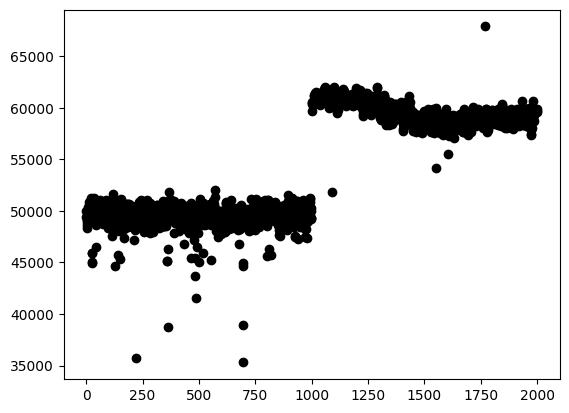

In [15]:
# Comparison of Variance between both the classes. Empty seat has comparatively higher variance than occupied seat.

y1=total["Variance"].loc[total["Label"]== 0]
y2=total["Variance"].loc[total["Label"]== 1]
x1=list(range(0,2000))
x2=list(range(0,2030))

plt.scatter( y = y1,x=x1, color = 'black')
#plt.scatter( y = y2,x=x2, color = 'red')

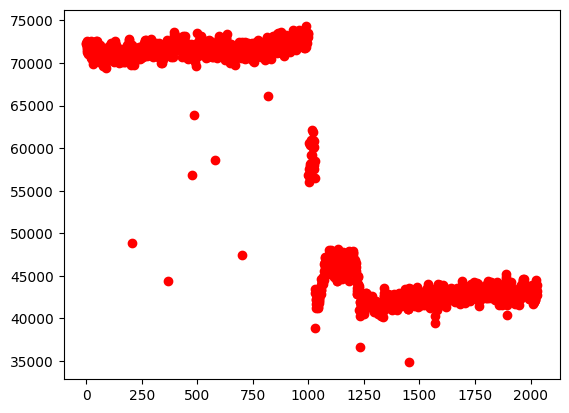

In [16]:
plt.scatter( y = y2,x=x2, color = 'red')

In [17]:
type(temparray)

numpy.ndarray

In [18]:
onlyval.apply(lambda x: x.nlargest(5), axis=1)

,40174,40293,40650,40770,40889,41008,41127,41246,41366,41485,41604,41723,41962
0,682.0,NaN,739.0,NaN,NaN,892.0,NaN,1000.0,NaN,NaN,945.0,NaN,NaN
1,695.0,NaN,749.0,NaN,NaN,911.0,NaN,1000.0,NaN,NaN,945.0,NaN,NaN
2,686.0,NaN,743.0,NaN,NaN,895.0,NaN,1000.0,NaN,NaN,936.0,NaN,NaN
3,678.0,NaN,741.0,NaN,NaN,890.0,NaN,1000.0,NaN,NaN,941.0,NaN,NaN
4,678.0,NaN,740.0,NaN,NaN,891.0,NaN,1000.0,NaN,NaN,939.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,NaN,NaN,687.0,715.0,801.0,NaN,1000.0,NaN,NaN,616.0,NaN,NaN,NaN
2026,NaN,NaN,706.0,717.0,806.0,NaN,1000.0,NaN,NaN,618.0,NaN,NaN,NaN
2027,NaN,NaN,707.0,716.0,788.0,NaN,1000.0,NaN,NaN,617.0,NaN,NaN,NaN
2028,NaN,NaN,695.0,708.0,774.0,NaN,1000.0,NaN,NaN,617.0,NaN,NaN,NaN


In [28]:
#empty['41723']

0        999
1       1000
2       1000
3       1000
4        999
        ... 
4995    1000
4996    1000
4997    1000
4998    1000
4999    1000
Name: 41723, Length: 5000, dtype: int64

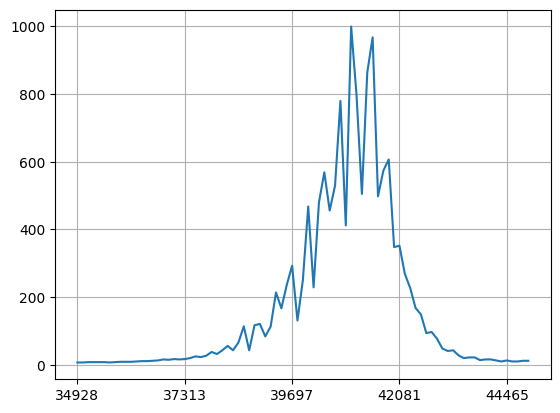

In [25]:
emptyfinal2 = empty.iloc[650,0:85]
plotempty2 = emptyfinal2.T
ax = plotempty2.plot(legend=None)
ax.grid(True)

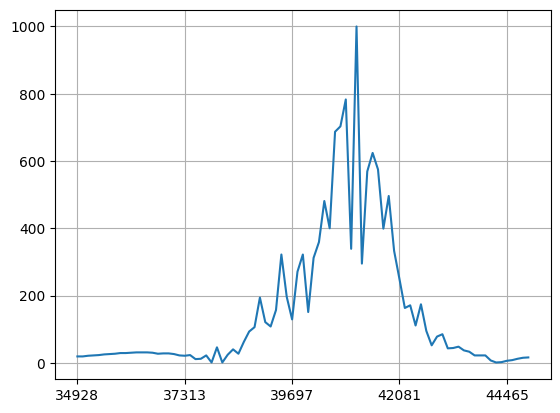

In [29]:
babyfinal2 = baby.iloc[850,0:85]
plotbaby2 = babyfinal2.T
ax2 = plotbaby2.plot(legend=None)
ax2.grid(True)

In [ ]:
#Check number of peaks above 800

Ask for exact model of ultrasonic sensor , as for SRF02 has minimum range as 15 cm
ask about possibility of creating an ideal average signal and doing cross correlation of the signal to be detected with this ideal signal.
ask about changing angle of lower sensor, try taking measurements from upper sensor
confirm sampling rate and then analyse whether outliers pose a real risk in detection or not.

Calculate variance
Calculate difference from 1st peak to 2nd peak in amplitude and also frequency.
Repeat the same for difference between 2nd peak to 3rd peak and so on.

Check chance of cloth near head being detected as false baby